In [1]:
import pandas as pd
import time
from time import sleep
import os,sys
from threading import Thread
from google.colab import output,drive
import datetime
import matplotlib.pyplot as plt
import numpy as np
import datetime
!pip install smartapi-python
!pip install pyotp
!pip install logzero
!curl -L http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz -O && tar xzvf ta-lib-0.4.0-src.tar.gz
!cd ta-lib && ./configure --prefix=/usr && make && make install && cd - && pip install ta-lib
output.clear()

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
from SmartApi import SmartConnect #or from SmartApi.smartConnect import SmartConnect
import pyotp

api_key = 'Your_API_Key'
clientId = 'You_Client_Id'
pwd = 'Your_AngelOne_Password'
smartApi = SmartConnect(api_key)
smartApi._routes["api.market.data"]="/rest/secure/angelbroking/market/v1/quote"
token = "Your_TOTP_Token"
totp=pyotp.TOTP(token).now()
correlation_id = "hdhdjdjdjd"

# login api call

data = smartApi.generateSession(clientId, pwd, totp)
# print(data)
authToken = data['data']['jwtToken']
refreshToken = data['data']['refreshToken']

# fetch the feedtoken
feedToken = smartApi.getfeedToken()

# fetch User Profile
res = smartApi.getProfile(refreshToken)
smartApi.generateToken(refreshToken)
res=res['data']['exchanges']

In [4]:
from datetime import datetime,timedelta
import talib
import numpy as np
start=time.time()

def history(historicParam):
    try:
        return smartApi.getCandleData(historicParam)
    except Exception as e:
        print("Historic Api failed: {}".format(e.message))

from datetime import datetime,timedelta,date
import time

t=datetime.now()
#df=datetime(t.year,t.month,t.day,9,15)
t=datetime(t.year,t.month,t.day,t.hour,t.minute)
arr=[]

historicParam={    "exchange": "NSE",
    "symboltoken": "3045",
    "interval": "FIVE_MINUTE",
    "fromdate": "",
    "todate": ""
    }
fromdate=datetime(t.year,t.month-2,t.day-1,9,15)
todate=t
#print(fromdate,' ',todate)
historicParam['fromdate']=fromdate.strftime("%Y-%m-%d %H:%M")
historicParam['todate']=todate.strftime("%Y-%m-%d %H:%M")

hist=history(historicParam)
#print(hist)
hist=hist['data']
print(len(hist))
columns=['timestamp','open','high','low','close','volume']
data=pd.DataFrame(hist,columns=columns)
data['timestamp']=pd.to_datetime(data['timestamp'],format="%Y-%m-%d %H:%M")
print(time.time()-start)

2000
1.5310564041137695


In [5]:
data.to_csv('SBIN_5_min.csv')

In [6]:
data=pd.read_csv('SBIN_5_min.csv')

In [ ]:
val={}
Columns=['close']
for col in Columns:
    val[col]=np.array(data[col]).flatten()
ind=np.array(data.index).flatten()
df=pd.DataFrame(val,index=ind)
#sc=StandardScaler()
#df[Columns]=sc.fit_transform(df[Columns])
for i in range(len(df)):
    df['close'][i]=df['close'][i]*0.001

In [ ]:
_7EMA=talib.EMA(np.array(df['close']),7)
_21EMA=talib.EMA(np.array(df['close']),21)

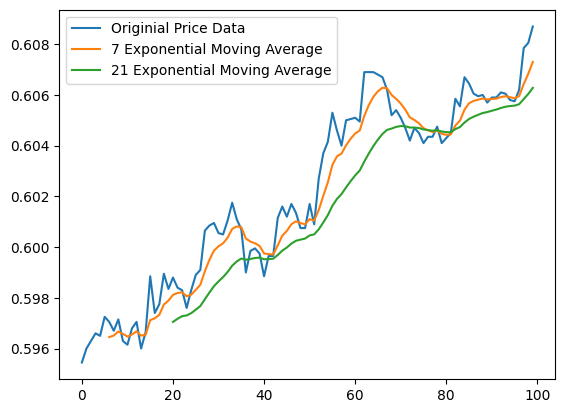

In [ ]:
ax=plt.subplot()
ax.plot(df.index[:100],df['close'][:100])
ax.plot(df.index[:100],_7EMA[:100])
ax.plot(df.index[:100],_21EMA[:100])
ax.legend(['Originial Price Data','7 Exponential Moving Average','21 Exponential Moving Average'])

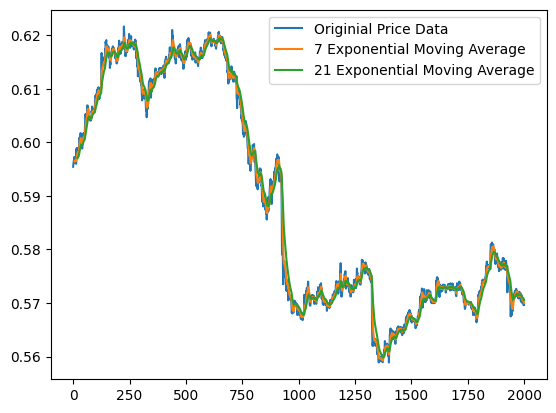

In [ ]:

ax=plt.subplot()
ax.plot(df.index,df['close'])
ax.plot(df.index,_7EMA)
ax.plot(df.index,_21EMA)
ax.legend(['Originial Price Data','7 Exponential Moving Average','21 Exponential Moving Average'])

In [ ]:
'''ax=plt.subplot()
ax.plot(df.time,df['close'])
ax.plot(df.time,df['7EMA'])
ax.plot(df.time,df['21EMA'])
ax.legend(['Originial Price Data','7 Exponential Moving Average','21 Exponential Moving Average'])'''

"ax=plt.subplot()\nax.plot(df.time,df['close'])\nax.plot(df.time,df['7EMA'])\nax.plot(df.time,df['21EMA'])\nax.legend(['Originial Price Data','7 Exponential Moving Average','21 Exponential Moving Average'])"

In [ ]:
temp=df.copy()
df=temp.copy()

In [ ]:
temp.head()

,close
0,0.59545
1,0.59600
2,0.59630
3,0.59660
4,0.59650


In [ ]:
df=temp.copy()

In [ ]:
n=5
df=temp.copy()
tf=pd.DataFrame()
Temp=np.array(df['close']).flatten()
#tf['open']=[]
for i in range(n):
    tf[f'close{i+1}']=[]
tf['close']=[]
coltf=np.array(tf.columns).flatten()
print(coltf)
for i in range(n,len(df)):
    #print(i)
    point={}
    #point['open']=df['open'][i]
    cl=Temp[i-n:i+1]
    #print('cl:',str(cl))
    for j in range(n+1):
        point[coltf[j]]=cl[j]
        #print('j:',j)
    #print('IN')
    #point['close']=df['close'][i]
    #print(point)
    point=pd.DataFrame(point,index=[1])
    tf=pd.concat([tf,point],ignore_index=True)
    #tf=tf.reset_index(drop=True)
df=tf.copy()

['close1' 'close2' 'close3' 'close4' 'close5' 'close']


In [ ]:

_7EMA=_7EMA[n:]
_21EMA=_21EMA[n:]

In [ ]:

#df=df[800:]
#df=df.reset_index(drop=True)
df.head()

,close1,close2,close3,close4,close5,close
0,0.59545,0.59600,0.59630,0.59660,0.59650,0.59725
1,0.59600,0.59630,0.59660,0.59650,0.59725,0.59705
2,0.59630,0.59660,0.59650,0.59725,0.59705,0.59670
3,0.59660,0.59650,0.59725,0.59705,0.59670,0.59715
4,0.59650,0.59725,0.59705,0.59670,0.59715,0.59630


In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()
    dates=df.index#df_as_np[:,0]
    middle_matrix=df_as_np[:,:-1]
    X=middle_matrix.reshape((len(dates),middle_matrix.shape[1],1))
    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)
dates, X, y = windowed_df_to_date_X_y(df)

In [ ]:
dates.shape, X.shape, y.shape

((1995,), (1995, 5, 1), (1995,))

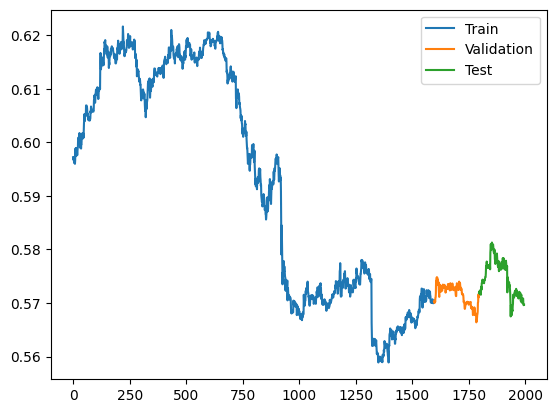

In [ ]:
q_80=int(len(dates)*0.8)
q_90=int(len(dates)*0.9)

dates_train,X_train,y_train=dates[:q_80],X[:q_80],y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

Now LSTM model training start

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import LSTM,Dense,Dropout

'''model=Sequential([
    layers.Dense(64,input_shape=(4,1)),        ## '64' is the number of units(neurons) and is necessary for dense layers
    layers.LSTM(32),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    #layers.Dense(256, activation='relu'),
    layers.Dense(1)
])
'''

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (n,1)))

model.add(Dropout(0.1))
model.add(LSTM(units=50))

model.add(Dense(1))

#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()


model.compile(loss='mse',optimizer=Adam(learning_rate=0.001),metrics=['mean_absolute_error'])

model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 5, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
50/50 [==============================] - 7s 31ms/step - loss: 0.0503 - mean_absolute_error: 0.1523 - val_loss: 0.0016 - val_mean_absolute_error: 0.0399
Epoch 2/100
50/50 [=

50/50 [==============================] - 1s 3ms/step


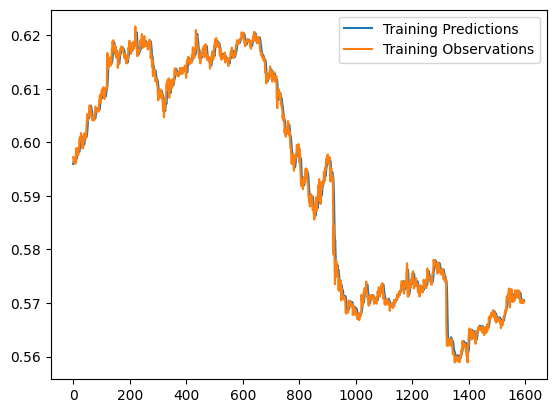

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

7/7 [==============================] - 0s 3ms/step


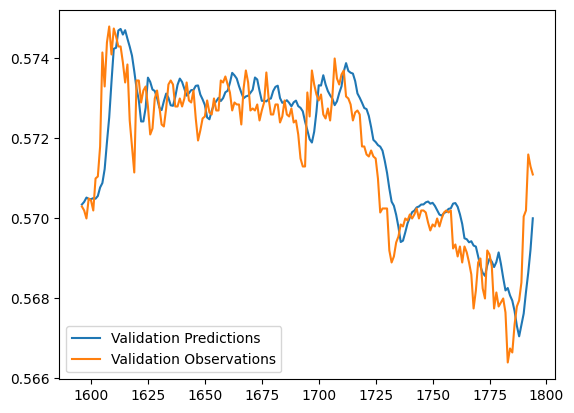

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

7/7 [==============================] - 0s 4ms/step


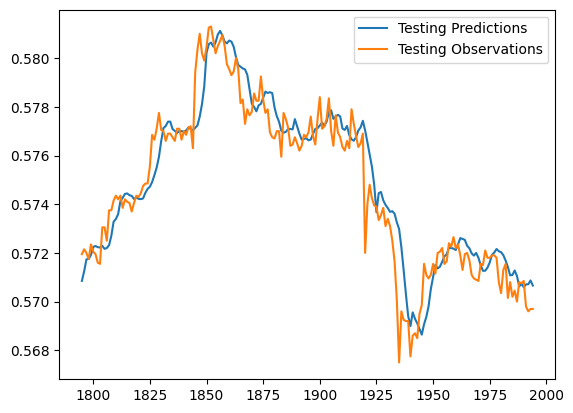

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [ ]:
print(y_test.shape,' ',test_predictions.shape)
y_test=np.array(y_test).flatten()
test_predictions=np.array(test_predictions).flatten()
from sklearn.metrics import mean_squared_error as mse,accuracy_score, f1_score
sum=0
for i in range(len(y_test)):
    sum+=abs(y_test[i]-test_predictions[i])
sum=sum/len(y_test)
print((1-sum*100)*100)

(200,)   (200,)
92.17169880867004


CALCULATING EMA based on Predicted 'close' Values

In [ ]:
pred_7EMA=[]
pred_21EMA=[]
prev_EMA=_7EMA[dates_test[0]-1]
for i in range(len(dates_test)):
    pred_7EMA.append(0.25*test_predictions[i]+prev_EMA*0.75)
    prev_EMA=pred_7EMA[-1]
prev_EMA=_21EMA[dates_test[0]-1]
for i in range(len(dates_test)):
    pred_21EMA.append((2/22.0)*test_predictions[i]+prev_EMA*(1-2/22))
    prev_EMA=pred_21EMA[-1]

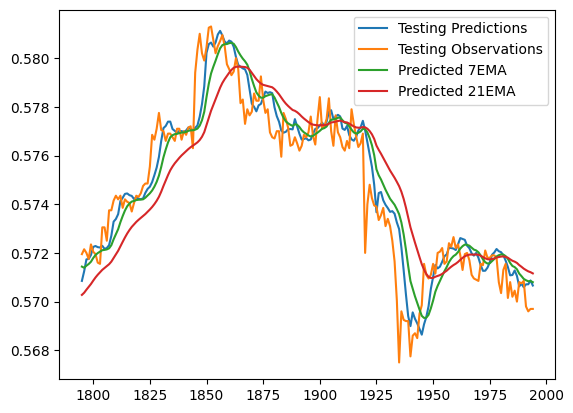

In [ ]:
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(dates_test,pred_7EMA)
plt.plot(dates_test,pred_21EMA)
plt.legend(['Testing Predictions', 'Testing Observations','Predicted 7EMA','Predicted 21EMA'])

In [ ]:
import joblib
joblib.dump(model,'SBIN_model.pkl')

['SBIN_model.pkl']